# Introduction

Main ipynb file for Maine Housing predicitive analysis using different regression and/or classification models.

Unsure yet as to if this will be a regression problem (predicting some continuous value e.g. number of affordable or available rental units in the state) or a classification problem (target vector will contain some categorical value/label for each input). Will determine which type of problem was data has been collected and explored.

# Code

Importing needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

Data Collection

In [2]:
census = pd.read_excel('data/Maine_PrelimIntercensal_2010_2019_MODIFIED_102023.xlsx')
maine_income = pd.read_excel('data/hinc01_1.xlsx')

Data Exploration

In [3]:
census.head()

,County name,Variable,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Maine,Population Estimate,1327968.800,1330062.000,1330954.200,1332674.400,1336619.600,1335771.800,1340293.000,1344959.200,1350610.400,1357528.600,1362359
1,Androscoggin County,Population Estimate,107775.550,107775.750,108088.950,108093.150,108491.350,108523.550,108977.750,109349.950,110084.150,110712.350,111139
2,Aroostook County,Population Estimate,71703.000,71414.000,70822.000,70152.000,69633.000,68953.000,68419.000,67754.000,67434.000,67240.000,67105
3,Cumberland County,Population Estimate,281613.900,283417.500,284938.100,287408.700,290533.300,292494.900,294844.500,296403.100,298748.700,300969.300,303069
4,Franklin County,Population Estimate,30704.875,30669.375,30520.875,30292.375,29965.875,29727.375,29641.875,29398.375,29364.875,29523.375,29456


In [4]:
census.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,1.562316e+05,1.564779e+05,1.565828e+05,1.567852e+05,1.572494e+05,1.571496e+05,1.576815e+05,1.582305e+05,1.588953e+05,1.597092e+05,1.602775e+05
std,3.101401e+05,3.107124e+05,3.109989e+05,3.115057e+05,3.125629e+05,3.124719e+05,3.136056e+05,3.147647e+05,3.161590e+05,3.178279e+05,3.190109e+05
min,1.754567e+04,1.734438e+04,1.723008e+04,1.711978e+04,1.696847e+04,1.684917e+04,1.681088e+04,1.668358e+04,1.657128e+04,1.671997e+04,1.680000e+04
25%,3.524512e+04,3.520762e+04,3.526912e+04,3.524062e+04,3.536412e+04,3.547562e+04,3.560912e+04,3.593862e+04,3.635312e+04,3.665362e+04,3.669900e+04
50%,5.435922e+04,5.457412e+04,5.456803e+04,5.469593e+04,5.465182e+04,5.445272e+04,5.474562e+04,5.482253e+04,5.512043e+04,5.540232e+04,5.547800e+04
75%,1.220940e+05,1.219010e+05,1.217900e+05,1.214270e+05,1.216170e+05,1.214830e+05,1.220380e+05,1.225500e+05,1.227460e+05,1.229810e+05,1.236420e+05
max,1.327969e+06,1.330062e+06,1.330954e+06,1.332674e+06,1.336620e+06,1.335772e+06,1.340293e+06,1.344959e+06,1.350610e+06,1.357529e+06,1.362359e+06


In [5]:
# Locating a particular county by index number 
census.iloc[[2]]

,County name,Variable,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Aroostook County,Population Estimate,71703.0,71414.0,70822.0,70152.0,69633.0,68953.0,68419.0,67754.0,67434.0,67240.0,67105


In [6]:
#Max pop value for a particular region (statewide, or particular county)
census.loc[[2]].max(numeric_only=True).max()

71703.0

In [7]:
# Dropping data for the entire state from rest of dataset
counties = census.drop([0])
counties.head()

,County name,Variable,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Androscoggin County,Population Estimate,107775.550,107775.750,108088.950,108093.150,108491.350,108523.550,108977.750,109349.950,110084.150,110712.350,111139
2,Aroostook County,Population Estimate,71703.000,71414.000,70822.000,70152.000,69633.000,68953.000,68419.000,67754.000,67434.000,67240.000,67105
3,Cumberland County,Population Estimate,281613.900,283417.500,284938.100,287408.700,290533.300,292494.900,294844.500,296403.100,298748.700,300969.300,303069
4,Franklin County,Population Estimate,30704.875,30669.375,30520.875,30292.375,29965.875,29727.375,29641.875,29398.375,29364.875,29523.375,29456
5,Hancock County,Population Estimate,54359.225,54574.125,54568.025,54695.925,54651.825,54452.725,54745.625,54822.525,55120.425,55402.325,55478


Data Visualization

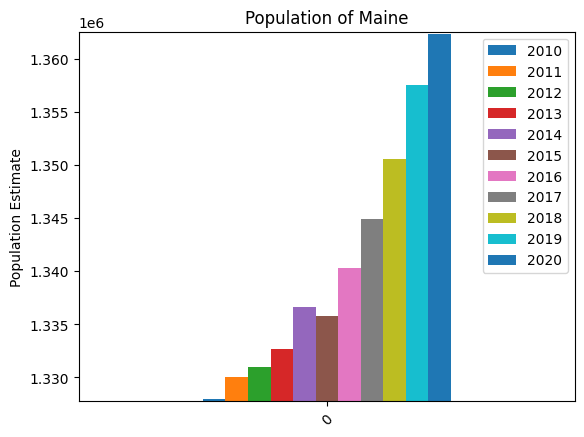

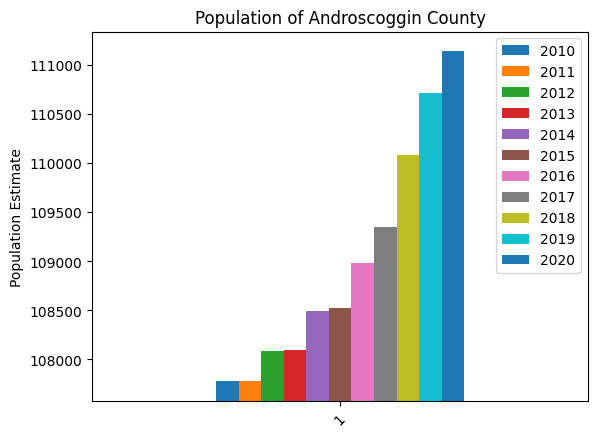

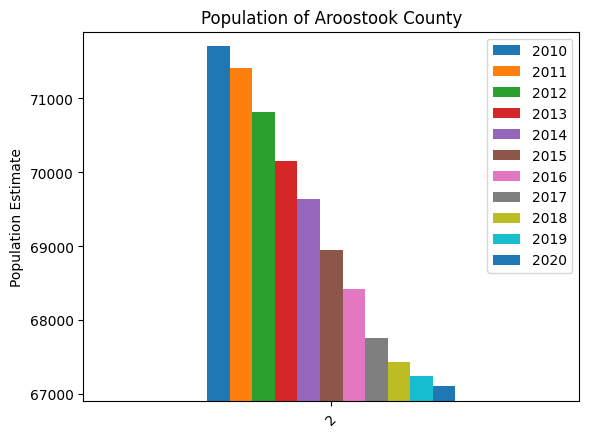

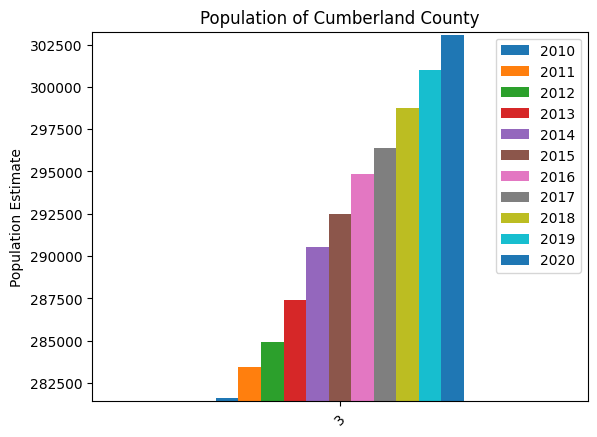

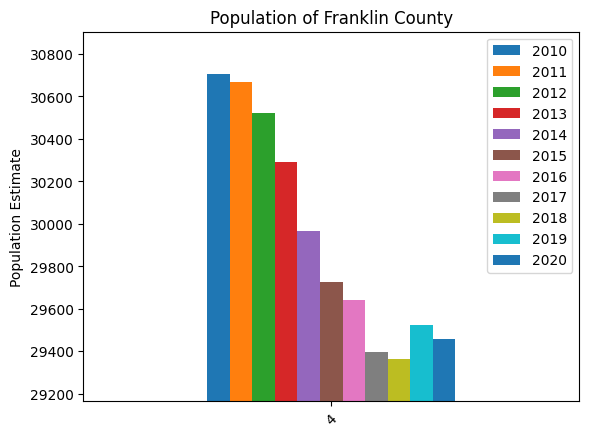

In [19]:
# Population of each county and statewide over the last decade (2010 - 2020)
for i in range(census.shape[0]):
    region = census.iloc[[i]]
    ax = region.plot.bar(ylabel='Population Estimate',
               title='Population of {}'.format(census['County name'][i]),
                ylim=(census.loc[[i]].min(numeric_only=True).min()-200,
                      census.loc[[i]].max(numeric_only=True).max()+200))
    ax.figure.savefig('figures/PopComparison_per_county/{}_barplot_census_pop.png'.format(census['County name'][i]))
    if i > 4:
        plt.close()

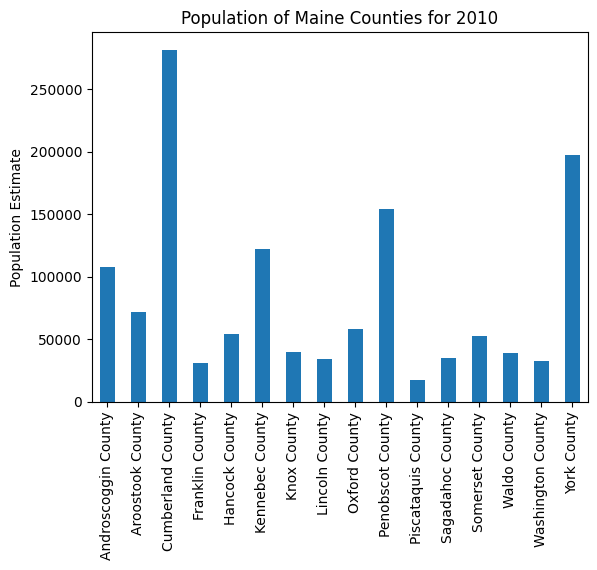

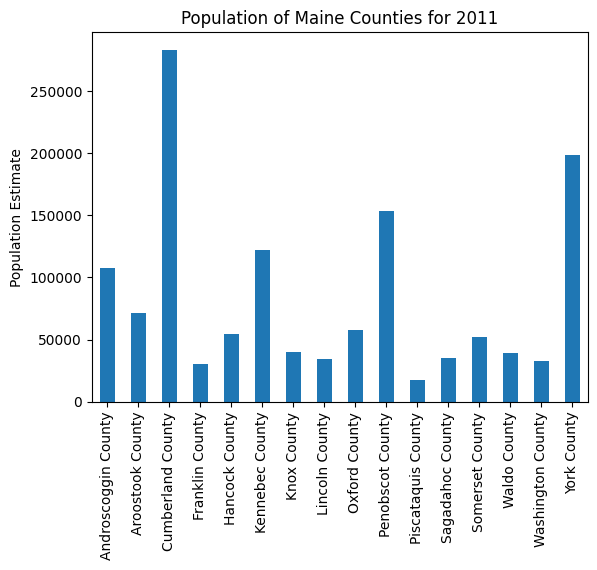

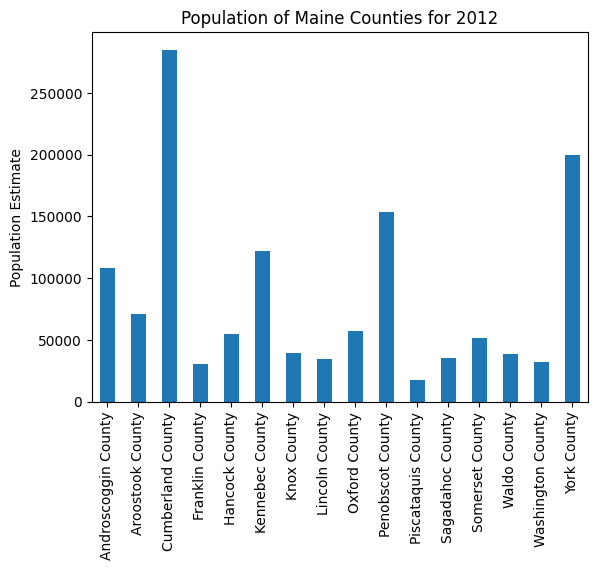

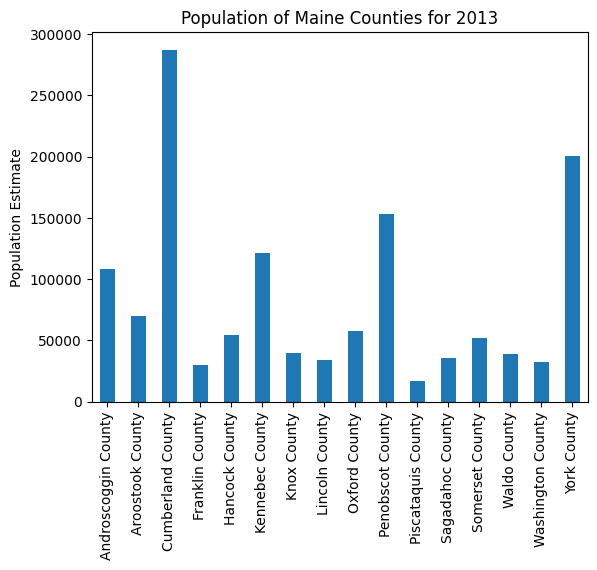

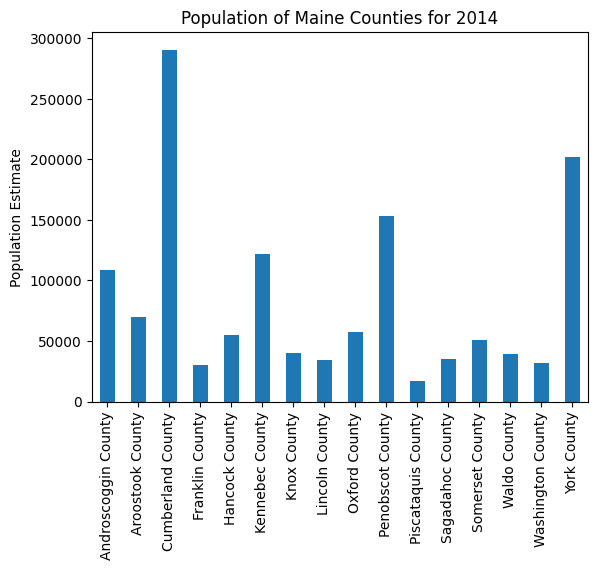

In [22]:
# Comparing the population of the different counties over each year
for i in range (2010,2021):
    ax = counties.plot.bar(x='County name',y=i,legend=False,title = 'Population of Maine Counties for {}'.format(i), 
                      ylabel='Population Estimate',xlabel='')
    ax.figure.savefig('figures/PopComparison_per_year/{}_county_pop_comparison.png'.format(i))
    if i > 2014:
        plt.close()

In [9]:
# Data Preparation

In [10]:
# Modeling



In [11]:
# Model Evaluation 



# Conclusions/Actionable Insights